In [ ]:
!pip install --quiet statsmodels openpyxl seaborn

import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/datasets/Thesis Data/Final Data/'

print("Files in your folder:", os.listdir(folder))

Files in your folder: ['2024presgeresults.xlsx', 'bls_total_usa.csv', 'fred_merged.csv', 'bls_laus_all_metrics.csv', 'bls_state_area_employment_hours_earnings.csv', 'bea_pce_priceindex.csv']


          Date  PersonalConsumptionExpenditures  PCE_growth
281 2024-06-01                          19747.5    0.254857
282 2024-07-01                          19866.3    0.601595
283 2024-08-01                          19905.0    0.194802
284 2024-09-01                          20044.1    0.698819
285 2024-10-01                          20123.2    0.394630
286 2024-11-01                          20235.1    0.556075
287 2024-12-01                          20408.1    0.854950
288 2025-01-01                          20406.7   -0.006860
289 2025-02-01                          20518.9    0.549819
290 2025-03-01                          20653.3    0.655006


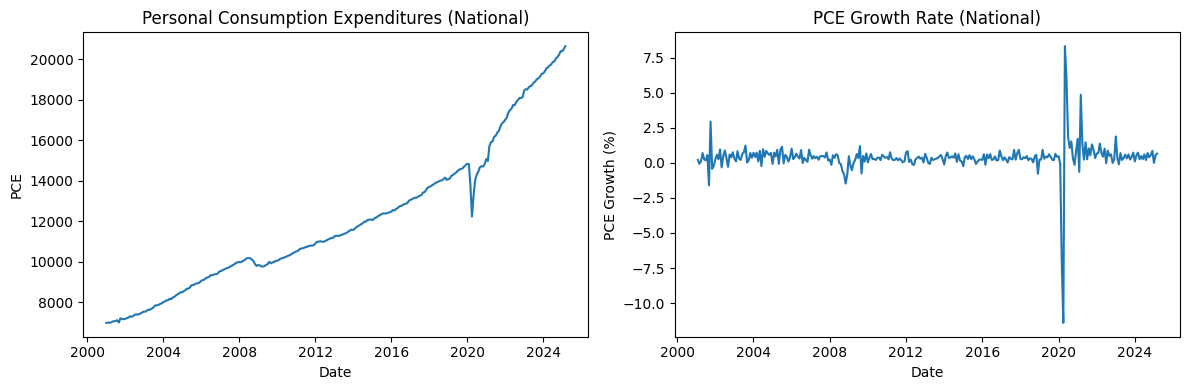

In [ ]:
# Load aggregate (national) data
nat = pd.read_csv(folder + 'fred_merged.csv', parse_dates=['Date'])

# Sort by date for correct pct_change calculation
nat = nat.sort_values('Date')
nat['PCE_growth'] = nat['PersonalConsumptionExpenditures'].pct_change() * 100

# Check a sample
print(nat[['Date', 'PersonalConsumptionExpenditures', 'PCE_growth']].tail(10))

# Plot National PCE and its Growth
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(nat['Date'], nat['PersonalConsumptionExpenditures'])
plt.title('Personal Consumption Expenditures (National)')
plt.xlabel('Date')
plt.ylabel('PCE')

plt.subplot(1,2,2)
plt.plot(nat['Date'], nat['PCE_growth'])
plt.title('PCE Growth Rate (National)')
plt.xlabel('Date')
plt.ylabel('PCE Growth (%)')
plt.tight_layout()
plt.show()

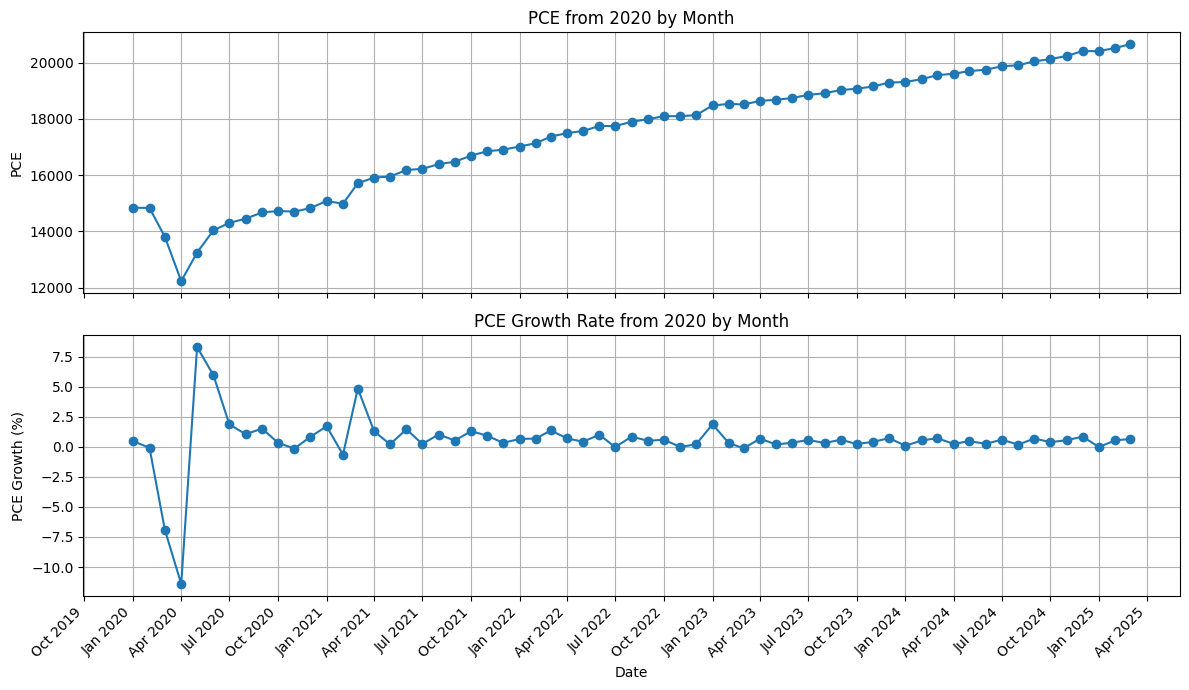

In [ ]:
import matplotlib.dates as mdates
mask_2020 = nat['Date'] >= pd.to_datetime('2020-01-01')
nat_2020 = nat[mask_2020]

fig, axs = plt.subplots(2, 1, figsize=(12,7), sharex=True)

axs[0].plot(nat_2020['Date'], nat_2020['PersonalConsumptionExpenditures'], marker='o')
axs[0].set_title('PCE from 2020 by Month')
axs[0].set_ylabel('PCE')
axs[0].grid(True)

axs[1].plot(nat_2020['Date'], nat_2020['PCE_growth'], marker='o')
axs[1].set_title('PCE Growth Rate from 2020 by Month')
axs[1].set_ylabel('PCE Growth (%)')
axs[1].set_xlabel('Date')
axs[1].grid(True)

# Set major x-axis ticks quarterly
locator = mdates.MonthLocator(bymonth=[1,4,7,10])  # Quarterly (Jan, Apr, Jul, Oct)
formatter = mdates.DateFormatter('%b %Y')
axs[1].xaxis.set_major_locator(locator)
axs[1].xaxis.set_major_formatter(formatter)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

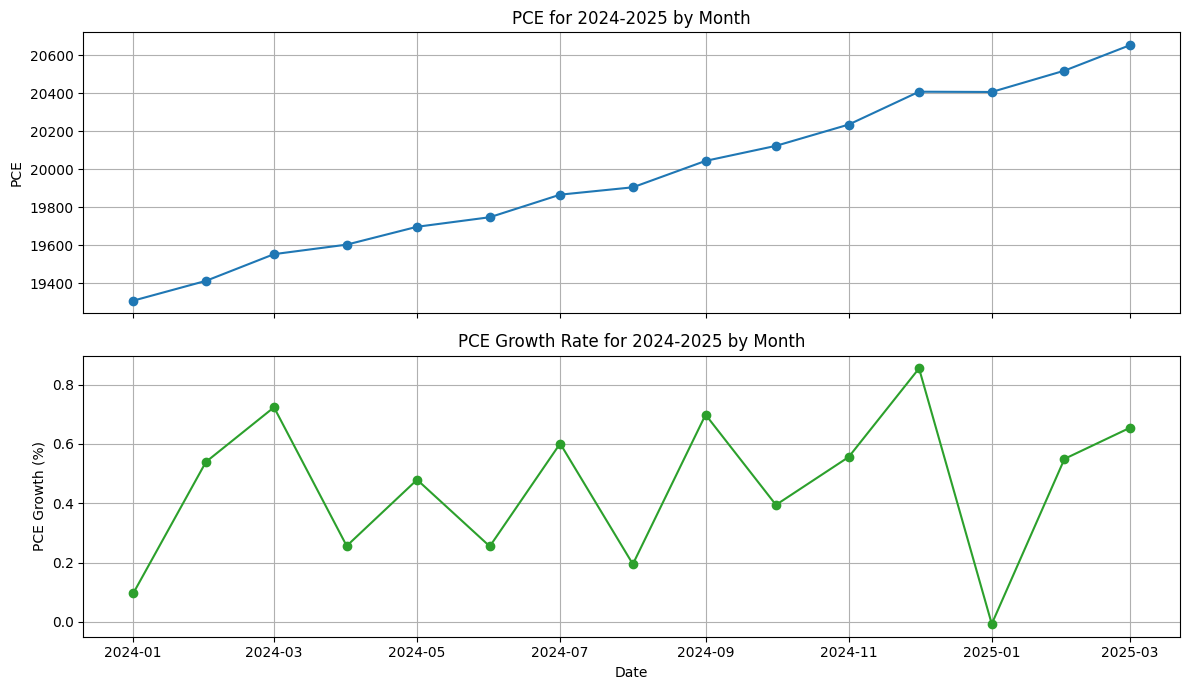

In [ ]:
mask_2425 = (nat['Date'] >= pd.to_datetime('2024-01-01')) & (nat['Date'] <= pd.to_datetime('2025-12-31'))
nat_2425 = nat[mask_2425]

fig, axs = plt.subplots(2, 1, figsize=(12,7), sharex=True)
axs[0].plot(nat_2425['Date'], nat_2425['PersonalConsumptionExpenditures'], marker='o', color='tab:blue')
axs[0].set_title('PCE for 2024-2025 by Month')
axs[0].set_ylabel('PCE')
axs[0].grid(True)

axs[1].plot(nat_2425['Date'], nat_2425['PCE_growth'], marker='o', color='tab:green')
axs[1].set_title('PCE Growth Rate for 2024-2025 by Month')
axs[1].set_ylabel('PCE Growth (%)')
axs[1].set_xlabel('Date')
axs[1].grid(True)

plt.tight_layout()
plt.show()

['Type of Product', 'Date', 'Year', 'Month', 'Month_Num', 'PCE', 'Price Index']
            Date                           Type of Product        PCE  \
2910  2001-01-01                     Clothing and footwear   285368.0   
2911  2001-02-01                     Clothing and footwear   282005.0   
11058 2001-01-01  Clothing, footwear, and related services   302156.0   
11059 2001-02-01  Clothing, footwear, and related services   298824.0   
12513 2001-01-01                             Communication   156154.0   
...          ...                                       ...        ...   
3784  2001-02-01                                  Services  4487992.0   
12222 2001-01-01                            Transportation   798927.0   
12223 2001-02-01                            Transportation   820461.0   
4947  2001-01-01                   Transportation services   268353.0   
4948  2001-02-01                   Transportation services   266643.0   

       PCE_growth  
2910          NaN  
291

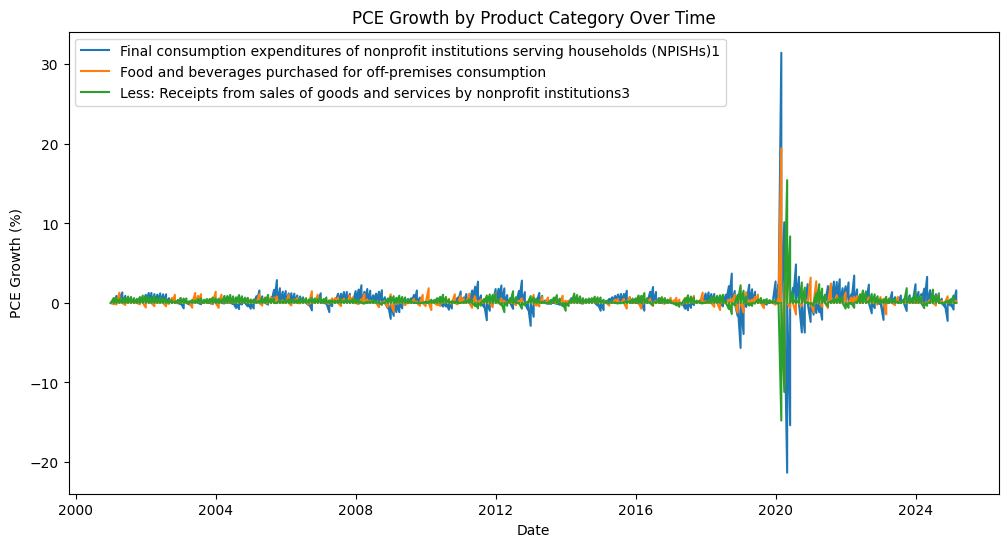

In [ ]:
bea = pd.read_csv(folder + 'bea_pce_priceindex.csv', parse_dates=['Date'])

# Double-check columns
print(bea.columns.tolist())

# Check for missing values
bea = bea.dropna(subset=['Type of Product', 'PCE'])
bea = bea.sort_values(['Type of Product', 'Date'])
bea['PCE_growth'] = bea.groupby('Type of Product')['PCE'].pct_change() * 100

# Check calculation for first 3 product types
print(bea[['Date','Type of Product','PCE','PCE_growth']].groupby('Type of Product').head(2))

# Plot for top 3 most common products
top_products = bea['Type of Product'].value_counts().index[:3]
plt.figure(figsize=(12,6))
for prod in top_products:
    prod_data = bea[bea['Type of Product'] == prod]
    plt.plot(prod_data['Date'], prod_data['PCE_growth'], label=prod)
plt.legend()
plt.title('PCE Growth by Product Category Over Time')
plt.xlabel('Date')
plt.ylabel('PCE Growth (%)')
plt.show()

# Facet plot
if bea['Type of Product'].nunique() <= 12:
    g = sns.FacetGrid(bea, col='Type of Product', col_wrap=3, sharey=True, height=3)
    g.map_dataframe(sns.lineplot, x='Date', y='PCE_growth')
    g.set_titles('{col_name}')
    g.fig.suptitle('PCE Growth by Product Category (Faceted)', y=1.03)
    plt.show()

In [ ]:
bea_2020 = bea[bea['Date'] >= pd.to_datetime('2020-01-01')]

print(bea_2020.columns.tolist())
print(bea_2020.head())


if bea_2020['Type of Product'].nunique() <= 12:
    g = sns.FacetGrid(bea_2020, col='Type of Product', col_wrap=3, sharey=True, height=3)
    g.map_dataframe(sns.lineplot, x='Date', y='PCE_growth')
    g.set_titles('{col_name}')
    g.fig.suptitle('PCE Growth by Product Category (2020–Present)', y=1.03)
    plt.show()

['Type of Product', 'Date', 'Year', 'Month', 'Month_Num', 'PCE', 'Price Index', 'PCE_growth']
            Type of Product       Date  Year Month  Month_Num       PCE  \
3138  Clothing and footwear 2020-01-01  2020   Jan          1  414340.0   
3139  Clothing and footwear 2020-02-01  2020   Feb          2  413617.0   
3140  Clothing and footwear 2020-03-01  2020   Mar          3  300335.0   
3141  Clothing and footwear 2020-04-01  2020   Apr          4  211437.0   
3142  Clothing and footwear 2020-05-01  2020   May          5  293827.0   

      Price Index  PCE_growth  
3138       97.636   -0.793005  
3139       97.995   -0.174494  
3140       96.820  -27.388139  
3141       92.965  -29.599614  
3142       90.503   38.966690  


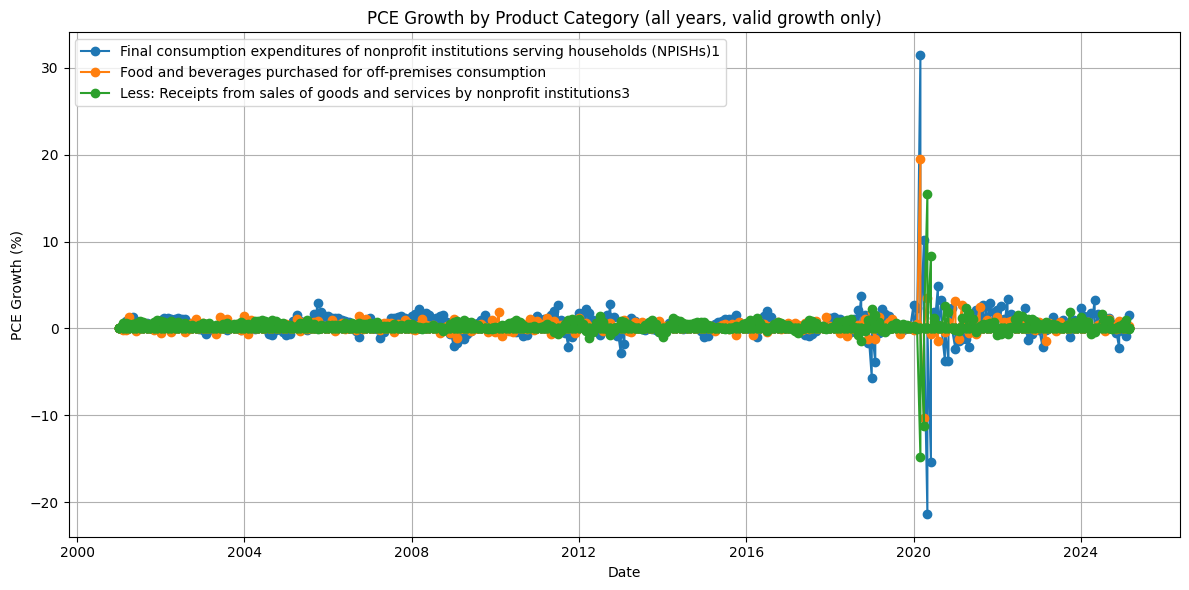

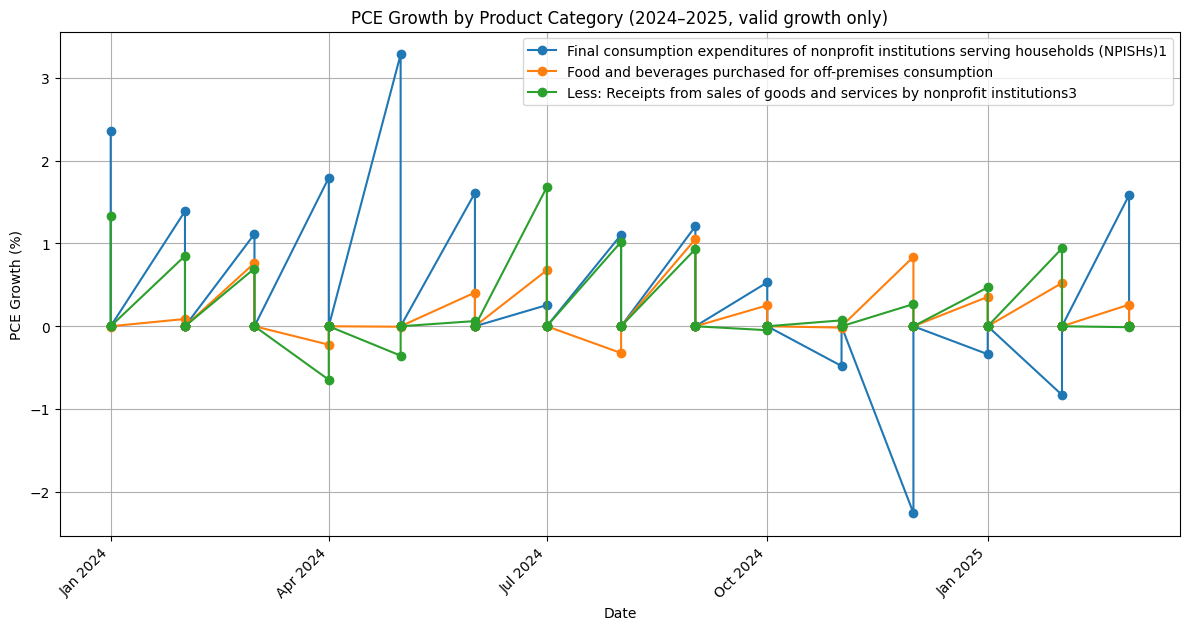

In [ ]:
top_products = bea['Type of Product'].value_counts().index[:3]

# PCE Growth by Product Category
plt.figure(figsize=(12,6))
for prod in top_products:
    prod_data = bea[(bea['Type of Product'] == prod) & (bea['PCE_growth'].notna())]
    plt.plot(prod_data['Date'], prod_data['PCE_growth'], label=prod, marker='o')
plt.legend()
plt.title('PCE Growth by Product Category (all years, valid growth only)')
plt.xlabel('Date')
plt.ylabel('PCE Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# PCE Growth by Product Category 2024-2025 only
mask_2425 = (bea['Date'] >= pd.to_datetime('2024-01-01')) & (bea['Date'] <= pd.to_datetime('2025-12-31'))
plt.figure(figsize=(12,6))
for prod in top_products:
    prod_data = bea[(bea['Type of Product'] == prod) & mask_2425 & (bea['PCE_growth'].notna())]
    plt.plot(prod_data['Date'], prod_data['PCE_growth'], label=prod, marker='o')
plt.legend()
plt.title('PCE Growth by Product Category (2024–2025, valid growth only)')
plt.xlabel('Date')
plt.ylabel('PCE Growth (%)')
plt.grid(True)
plt.tight_layout()

# Add quarterly x-axis labels for clarity
ax = plt.gca()
locator = mdates.MonthLocator(bymonth=[1,4,7,10])
formatter = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.show()

In [ ]:
print(bea['Type of Product'].unique())

['Clothing and footwear' 'Clothing, footwear, and related services'
 'Communication' 'Durable goods' 'Education' 'Energy goods and services5'
 'Final consumption expenditures of nonprofit institutions serving households (NPISHs)1'
 'Financial services and insurance'
 'Food and beverages purchased for off-premises consumption'
 'Food services and accommodations'
 'Furnishings and durable household equipment'
 'Furnishings, household equipment, and routine household maintenance'
 'Gasoline and other energy goods' 'Goods'
 'Gross output of nonprofit institutions2' 'Health' 'Health care'
 'Household consumption expenditures (for services)'
 'Household consumption expenditures7' 'Housing and utilities'
 'Housing, utilities, and fuels'
 'Less: Receipts from sales of goods and services by nonprofit institutions3'
 'Market-based PCE excluding food and energy6' 'Market-based PCE6'
 'Motor vehicles and parts' 'Nondurable goods' 'Other durable goods'
 'Other goods and services' 'Other nondurable 

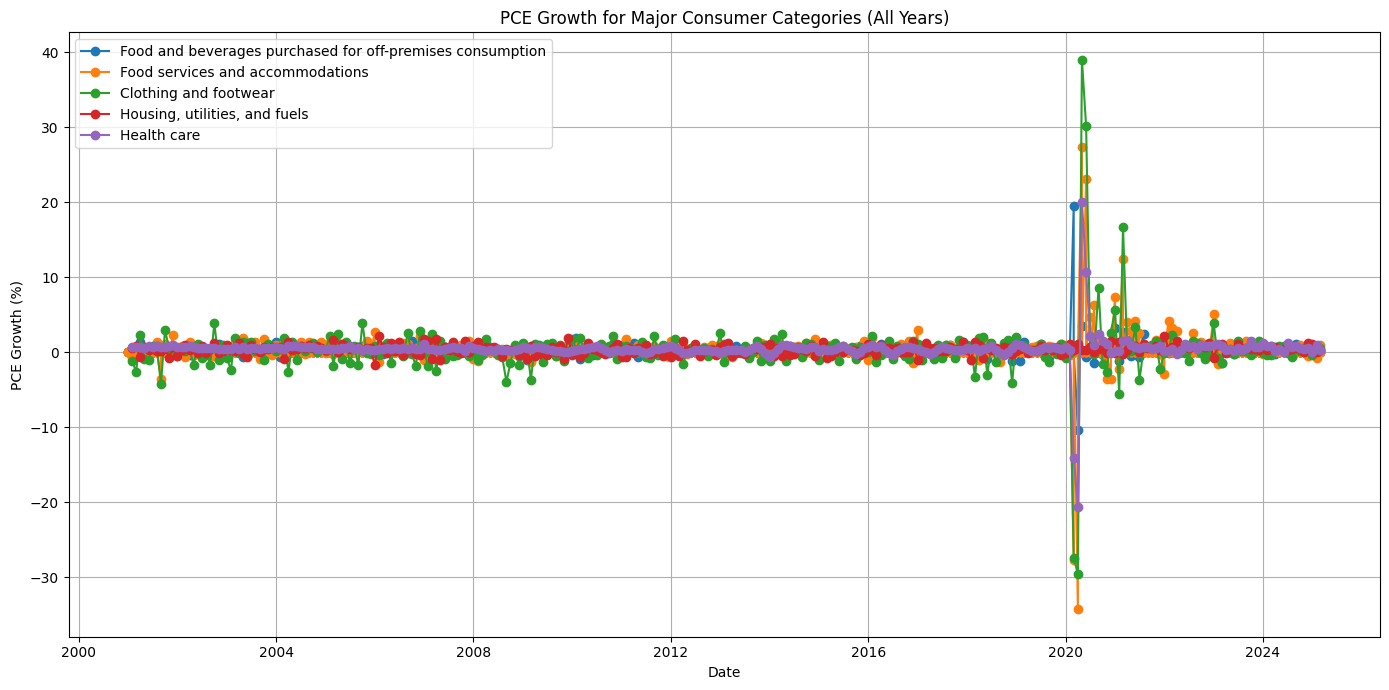

In [ ]:
import matplotlib.dates as mdates

# CONSUMER CATEGORY SELECTION
consumer_categories = [
    'Food and beverages purchased for off-premises consumption',
    'Food services and accommodations',
    'Clothing and footwear',
    'Housing, utilities, and fuels',
    'Health care'
]

# All years valid growth only
plt.figure(figsize=(14,7))
for prod in consumer_categories:
    prod_data = bea[(bea['Type of Product'] == prod) & (bea['PCE_growth'].notna())]
    if not prod_data.empty:
        plt.plot(prod_data['Date'], prod_data['PCE_growth'], label=prod, marker='o')
plt.legend()
plt.title('PCE Growth for Major Consumer Categories (All Years)')
plt.xlabel('Date')
plt.ylabel('PCE Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


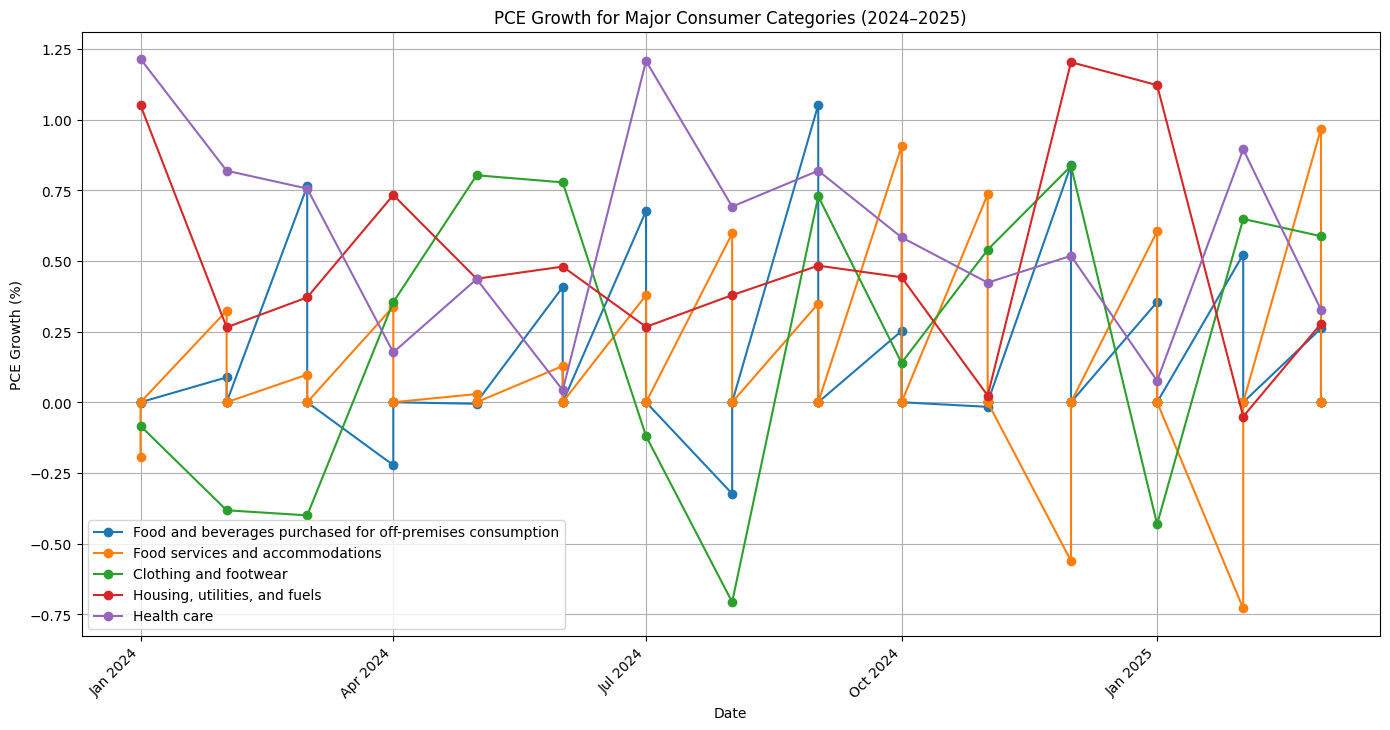

In [ ]:
# Growth 2024–2025 only
mask_2425 = (bea['Date'] >= pd.to_datetime('2024-01-01')) & (bea['Date'] <= pd.to_datetime('2025-12-31'))
plt.figure(figsize=(14,7))
for prod in consumer_categories:
    prod_data = bea[(bea['Type of Product'] == prod) & mask_2425 & (bea['PCE_growth'].notna())]
    if not prod_data.empty:
        plt.plot(prod_data['Date'], prod_data['PCE_growth'], label=prod, marker='o')
plt.legend()
plt.title('PCE Growth for Major Consumer Categories (2024–2025)')
plt.xlabel('Date')
plt.ylabel('PCE Growth (%)')
plt.grid(True)
plt.tight_layout()
ax = plt.gca()
locator = mdates.MonthLocator(bymonth=[1,4,7,10])
formatter = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.show()


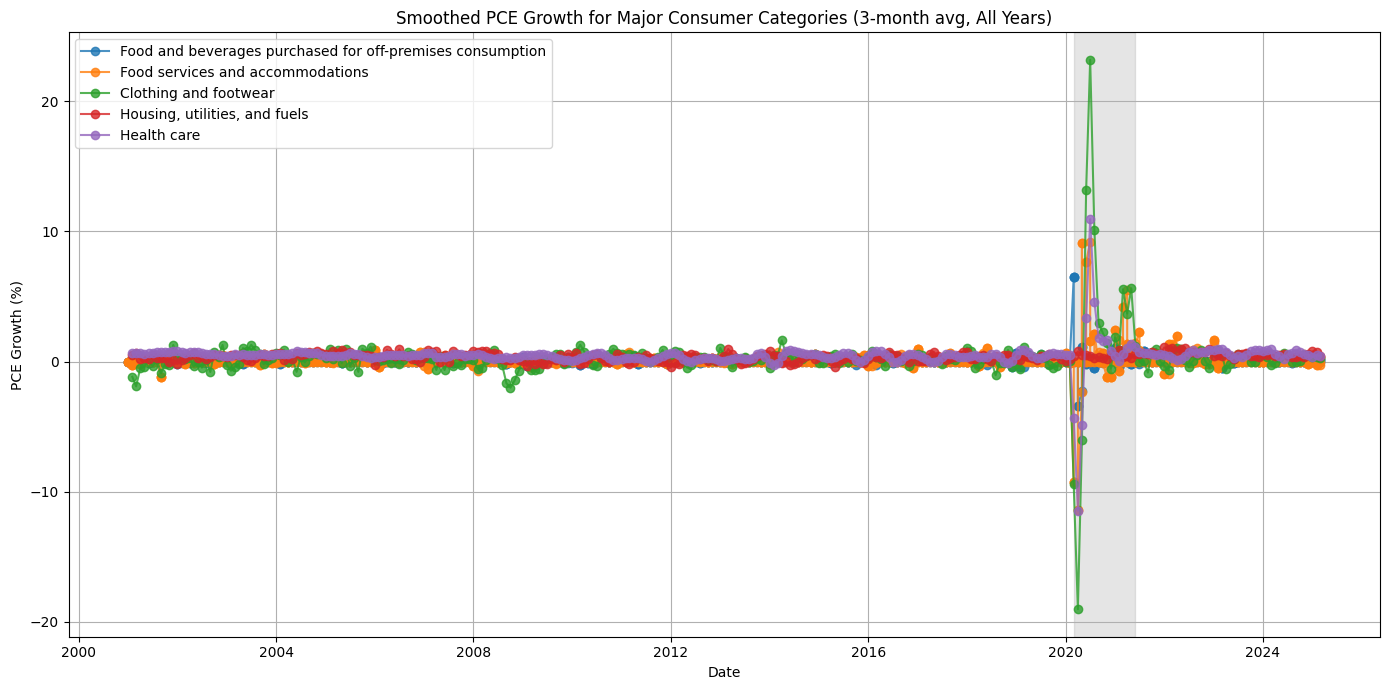

In [ ]:
import matplotlib.dates as mdates

# Smoothing window (3 months)
window = 3

plt.figure(figsize=(14,7))
for prod in consumer_categories:
    prod_data = bea[(bea['Type of Product'] == prod) & (bea['PCE_growth'].notna())].sort_values('Date')
    if not prod_data.empty:
        smoothed = prod_data['PCE_growth'].rolling(window=window, min_periods=1).mean()
        plt.plot(prod_data['Date'], smoothed, label=prod, marker='o', alpha=0.8)
plt.legend()
plt.title('Smoothed PCE Growth for Major Consumer Categories ({}-month avg, All Years)'.format(window))
plt.xlabel('Date')
plt.ylabel('PCE Growth (%)')
plt.grid(True)
plt.axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2021-06-01'), color='gray', alpha=0.2, label='COVID era')
plt.tight_layout()
plt.show()


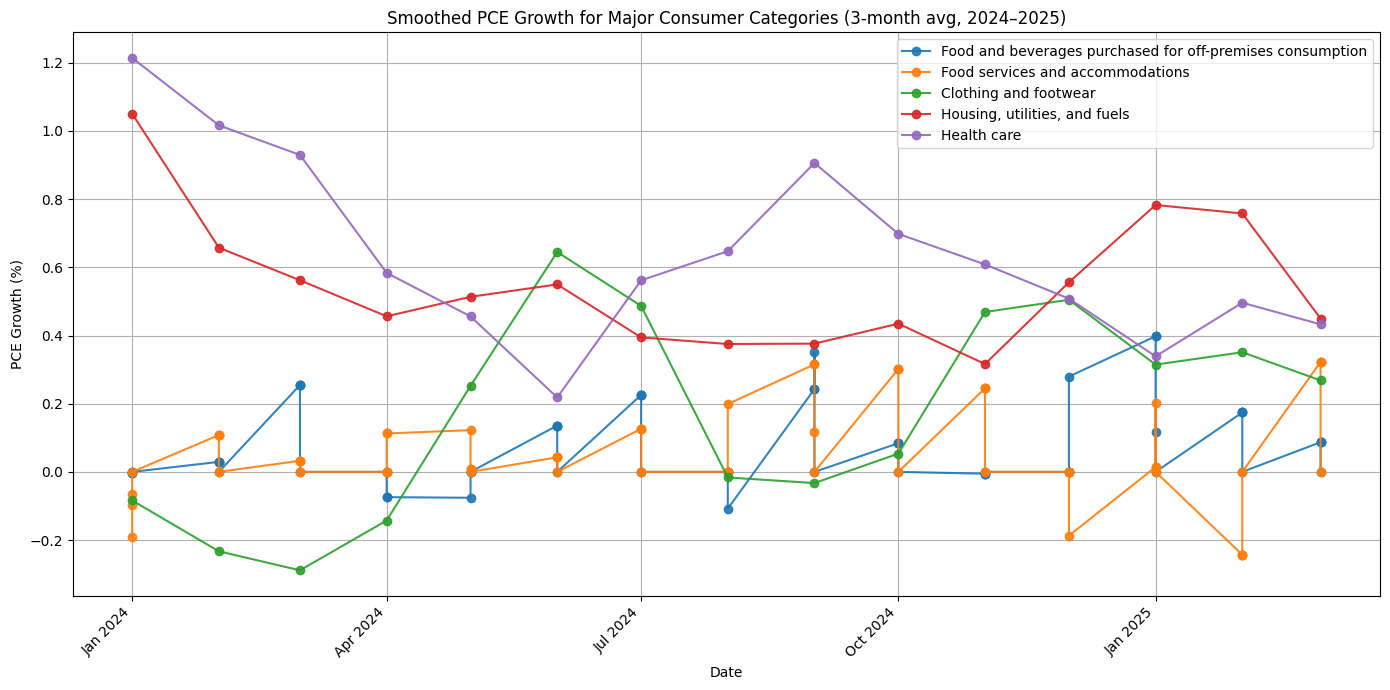

In [ ]:
mask_2425 = (bea['Date'] >= pd.to_datetime('2024-01-01')) & (bea['Date'] <= pd.to_datetime('2025-12-31'))
plt.figure(figsize=(14,7))
for prod in consumer_categories:
    prod_data = bea[(bea['Type of Product'] == prod) & mask_2425 & (bea['PCE_growth'].notna())].sort_values('Date')
    if not prod_data.empty:
        smoothed = prod_data['PCE_growth'].rolling(window=window, min_periods=1).mean()
        plt.plot(prod_data['Date'], smoothed, label=prod, marker='o', alpha=0.9)
plt.legend()
plt.title('Smoothed PCE Growth for Major Consumer Categories ({}-month avg, 2024–2025)'.format(window))
plt.xlabel('Date')
plt.ylabel('PCE Growth (%)')
plt.grid(True)
ax = plt.gca()
locator = mdates.MonthLocator(bymonth=[1,4,7,10])
formatter = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Aggregate to ensure only one value per (Date, Type of Product)
category_means_agg = (
    category_means.groupby(['Date', 'Type of Product'], as_index=False)['PCE_growth'].mean()
)

mean_growth = category_means_agg.pivot(index='Date', columns='Type of Product', values='PCE_growth').mean(axis=1)


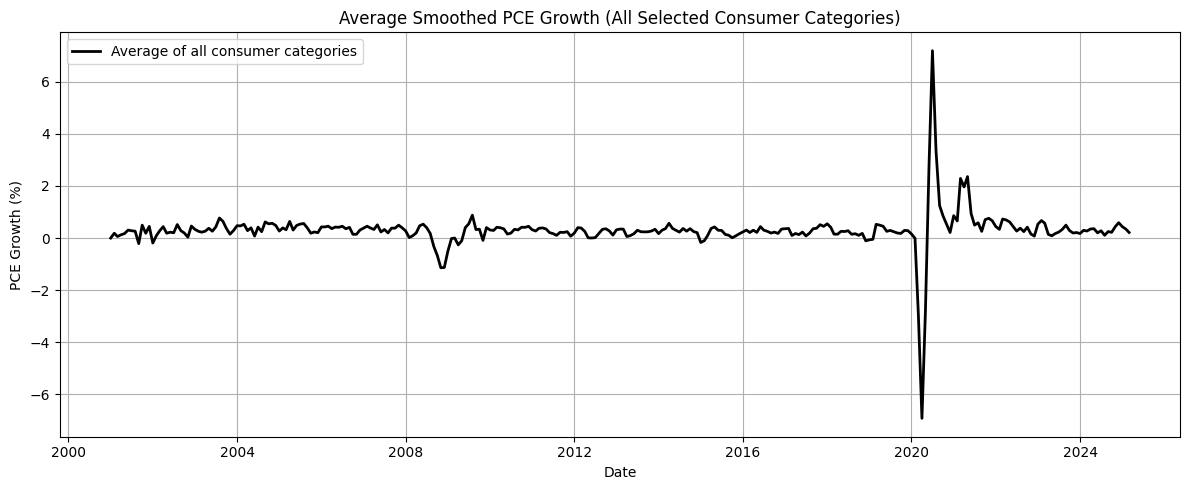

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(mean_growth.index, mean_growth.rolling(window=window, min_periods=1).mean(), color='k', lw=2, label='Average of all consumer categories')
plt.title('Average Smoothed PCE Growth (All Selected Consumer Categories)')
plt.xlabel('Date')
plt.ylabel('PCE Growth (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:             PCE_growth   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.221
Date:                Sat, 17 May 2025   Prob (F-statistic):             0.0858
Time:                        21:45:08   Log-Likelihood:                -441.06
No. Observations:                 290   AIC:                             890.1
Df Residuals:                     286   BIC:                             904.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

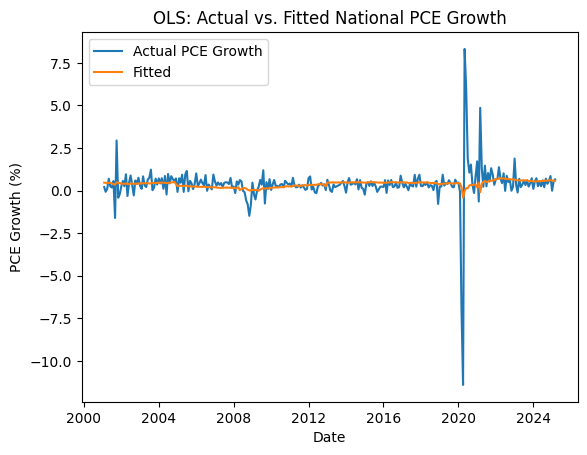

In [ ]:
#OLS Results
macro_vars = ['DebtServicePct','PersonalSavingRate','ConsumerSentimentIndex']
nat_reg = nat.dropna(subset=macro_vars + ['PCE_growth'])
X = nat_reg[macro_vars]
X = sm.add_constant(X)
y = nat_reg['PCE_growth']
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

plt.figure()
plt.plot(nat_reg['Date'], y, label='Actual PCE Growth')
plt.plot(nat_reg['Date'], ols_model.fittedvalues, label='Fitted')
plt.title('OLS: Actual vs. Fitted National PCE Growth')
plt.xlabel('Date')
plt.ylabel('PCE Growth (%)')
plt.legend()
plt.show()


In [ ]:
from linearmodels.panel import PanelOLS

bea = bea.rename(columns={'Type of Product': 'Type_of_Product'})
bea['YearMonth'] = bea['Date'].dt.to_period('M').astype(str)

# Set multi-index for panel data
bea_panel = bea.set_index(['Type_of_Product', 'Date']).sort_index()

macro_vars = [col for col in ['DebtServicePct','PersonalSavingRate','ConsumerSentimentIndex']
              if col in bea_panel.columns]
needed_cols = ['PCE_growth'] + macro_vars
panel_data = bea_panel[needed_cols].dropna()


if macro_vars:
    exog = sm.add_constant(bea_panel[macro_vars])
else:
    exog = pd.DataFrame({'const': 1}, index=bea_panel.index)

# Fit model
mod = PanelOLS(
    bea_panel['PCE_growth'],
    exog,
    entity_effects=True,   # Product fixed effects
    time_effects=True      # Time fixed effects (by Date)
)
fe_res = mod.fit()
print(fe_res.summary)


/usr/local/lib/python3.11/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:             PCE_growth   R-squared:                     -2.22e-16
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:               16548   R-squared (Within):               0.0000
Date:                Sat, May 17 2025   R-squared (Overall):              0.0000
Time:                        21:49:21   Log-likelihood                -3.284e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                          --
Entities:                          39   P-value                               --
Avg Obs:                       424.31   Distribution:                         --
Min Obs:                       290.00                                           
Max Obs:                       1163.0   F-statistic (robust):                 --
                            

In [ ]:
# Panel OLS

from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import pandas as pd

macro_vars = [c for c in ['DebtServicePct','PersonalSavingRate','ConsumerSentimentIndex']
              if c in bea_panel.columns]
y_raw = bea_panel['PCE_growth']
if macro_vars:
    X_raw = sm.add_constant(bea_panel[macro_vars])
else:
    X_raw = pd.DataFrame({'const': 1}, index=bea_panel.index)

panel_clean = pd.concat([y_raw, X_raw], axis=1).dropna()

y = panel_clean['PCE_growth']
X = panel_clean.drop(columns=['PCE_growth'])

# Fit the two‐way FE model
mod = PanelOLS(
    y,
    X,
    entity_effects=True,    # fixed effects by Type of Product
    time_effects=True       # fixed effects by Date
)
fe_res = mod.fit()

print(fe_res.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:             PCE_growth   R-squared:                     -2.22e-16
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:               16548   R-squared (Within):               0.0000
Date:                Sat, May 17 2025   R-squared (Overall):              0.0000
Time:                        21:48:53   Log-likelihood                -3.284e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                          --
Entities:                          39   P-value                               --
Avg Obs:                       424.31   Distribution:                         --
Min Obs:                       290.00                                           
Max Obs:                       1163.0   F-statistic (robust):                 --
                            

# Employment, hours, earnings by State


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install linearmodels --quiet
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import os

folder = '/content/drive/MyDrive/datasets/Thesis Data/Final Data/'
print(os.listdir(folder))

# state panel data
df_state = pd.read_csv(folder + 'bls_state_area_employment_hours_earnings.csv', parse_dates=['Date'])
print(df_state.columns.tolist())
print(df_state.head())

# national macro data
nat = pd.read_csv(folder + 'fred_merged.csv', parse_dates=['Date'])
print(nat.columns.tolist())
print(nat.head())

print(df_state.columns.tolist())

# Typical columns you may need to rename (adjust as needed based on printout):
rename_dict = {
    'state': 'State',
    'area': 'State',
    'employment': 'number_of_employees',
    'employment_total': 'number_of_employees',
    'emp_total': 'number_of_employees',
    'average_hourly_earnings': 'average_hourly_earnings',
    'avg_hourly_earnings': 'average_hourly_earnings',
    'PCE': 'PCE',
    'Price_Index': 'Price Index',
    'price_index': 'Price Index',
    'Average Hourly Earnings': 'average_hourly_earnings'
}
for orig, new in rename_dict.items():
    if orig in df_state.columns and new not in df_state.columns:
        df_state = df_state.rename(columns={orig: new})

# ensure colums exist
required_vars = ['State', 'Date', 'number_of_employees', 'average_hourly_earnings']
print(df_state[required_vars].head())

# merge national and state data
macro_vars = ['DebtServicePct','PersonalSavingRate','ConsumerSentimentIndex','PersonalConsumptionExpenditures']
nat_macro = nat[['Date'] + [col for col in macro_vars if col in nat.columns]]
df_panel = pd.merge(df_state, nat_macro, on='Date', how='left')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['2024presgeresults.xlsx', 'bls_total_usa.csv', 'fred_merged.csv', 'bls_laus_all_metrics.csv', 'bls_state_area_employment_hours_earnings.csv', 'bea_pce_priceindex.csv']
['Date', 'Year', 'Month', 'State', 'Sector', 'number_of_employees', 'average_weekly_hours', 'average_hourly_earnings']
        Date  Year Month    State              Sector  number_of_employees  \
0 2008-01-01  2008   Jan  Alabama  leisurehospitality                174.1   
1 2008-01-01  2008   Jan  Alabama       manufacturing                293.2   
2 2008-01-01  2008   Jan  Alabama         retailtrade                241.3   
3 2008-01-01  2008   Jan  Alabama        totalnonfarm               2028.7   
4 2008-01-01  2008   Jan  Alabama        totalprivate               1644.0   

   average_weekly_hours  average_hourly_earnings  
0                   NaN                     9.91  
1           

                           PanelOLS Estimation Summary                           
Dep. Variable:     number_of_employees   R-squared:                        0.1053
Estimator:                    PanelOLS   R-squared (Between):             -0.0645
No. Observations:                30636   R-squared (Within):               0.0790
Date:                 Sat, May 17 2025   R-squared (Overall):              0.0325
Time:                         21:45:27   Log-likelihood                -2.659e+05
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      3575.4
Entities:                           51   P-value                           0.0000
Avg Obs:                        600.71   Distribution:                 F(1,30378)
Min Obs:                        414.00                                           
Max Obs:                        621.00   F-statistic (robust):             42.924
                

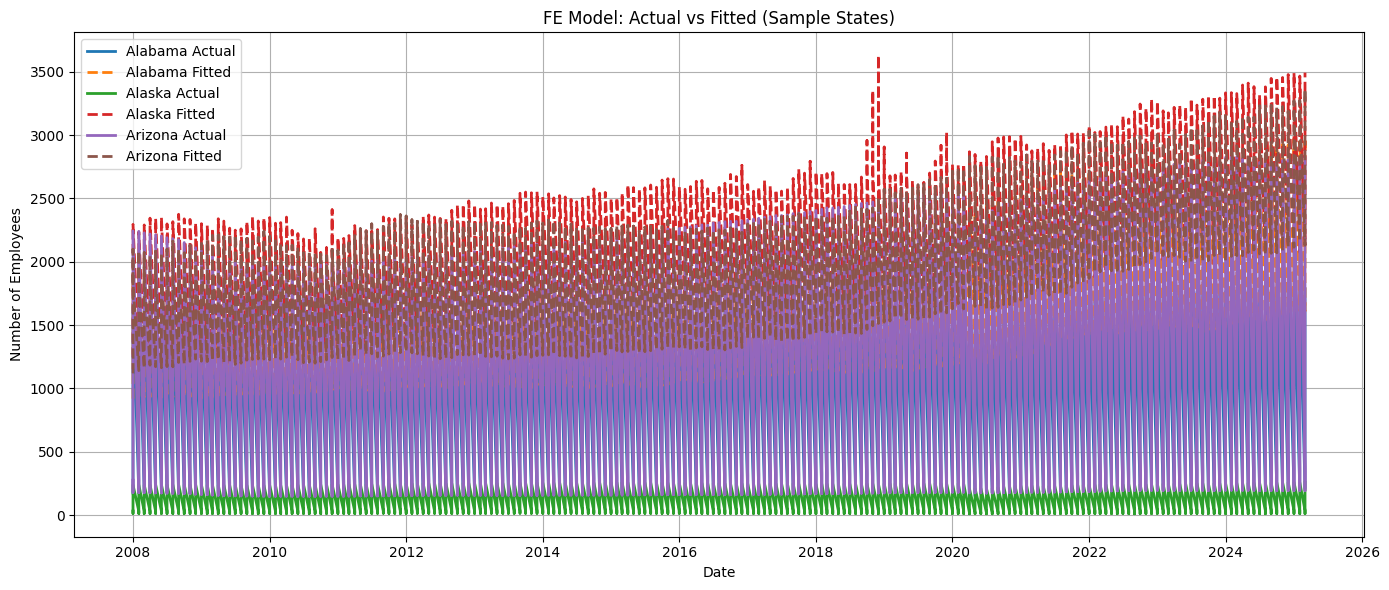

In [ ]:
# Two-Way Fixed Effects model
predictor_vars = ['average_hourly_earnings'] # Include state-level vars that vary by state and time

df_panel['Date'] = pd.to_datetime(df_panel['Date'])
df_panel['State'] = df_panel['State'].astype(str)

# Set multi-index and drop NaNs for required variables
required_subset = ['number_of_employees'] + predictor_vars
df_fe = df_panel.dropna(subset=required_subset).set_index(['State', 'Date']).sort_index()

y = df_fe['number_of_employees']

# Select exogenous variables (predictors)
X = df_fe[predictor_vars]

mod_fe = PanelOLS(y, X, entity_effects=True, time_effects=True)

res_fe = mod_fe.fit(cov_type='clustered', cluster_entity=True)

print(res_fe.summary)

# plots
fitted = res_fe.fitted_values
actual = y

fitted = fitted.reindex(actual.index)

dates = actual.index.get_level_values('Date') # Use actual's index as it matches y
sample_states = actual.index.get_level_values('State').unique()[:3]  # Plot for 3 states

plt.figure(figsize=(14,6))
for state in sample_states:
    # Ensure indices match for selecting data for the state
    actual_state = actual.loc[state]
    fitted_state = fitted.loc[state]

    plt.plot(actual_state.index, actual_state.values, label=f"{state} Actual", linewidth=2)
    plt.plot(fitted_state.index, fitted_state.values, '--', label=f"{state} Fitted", linewidth=2)


plt.xlabel("Date")
plt.ylabel("Number of Employees")
plt.title("FE Model: Actual vs Fitted (Sample States)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# VAR Model
var_vars = ['number_of_employees', 'average_hourly_earnings'] + [v for v in macro_vars if v in df_panel.columns]
df_nat = (
    df_panel
    .groupby('Date')[var_vars]
    .mean()
    .dropna()
    .sort_index()
)

var_mod = VAR(df_nat)
lag_selection = var_mod.select_order(12)
best_lag = lag_selection.aic
print(f"Selected lag order by AIC: {best_lag}")

var_res = var_mod.fit(best_lag)
print(var_res.summary())



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Selected lag order by AIC: 12
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 17, May, 2025
Time:                     21:45:28
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    13.0659
Nobs:                     195.000    HQIC:                   8.69080
Log likelihood:          -1779.29    FPE:                    381.339
AIC:                      5.71420    Det(Omega_mle):         56.5861
--------------------------------------------------------------------
Results for equation number_of_employees
                                         coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------
const                                     438.653800        98.954645            4.433           0.000
L1.number_of_employees         

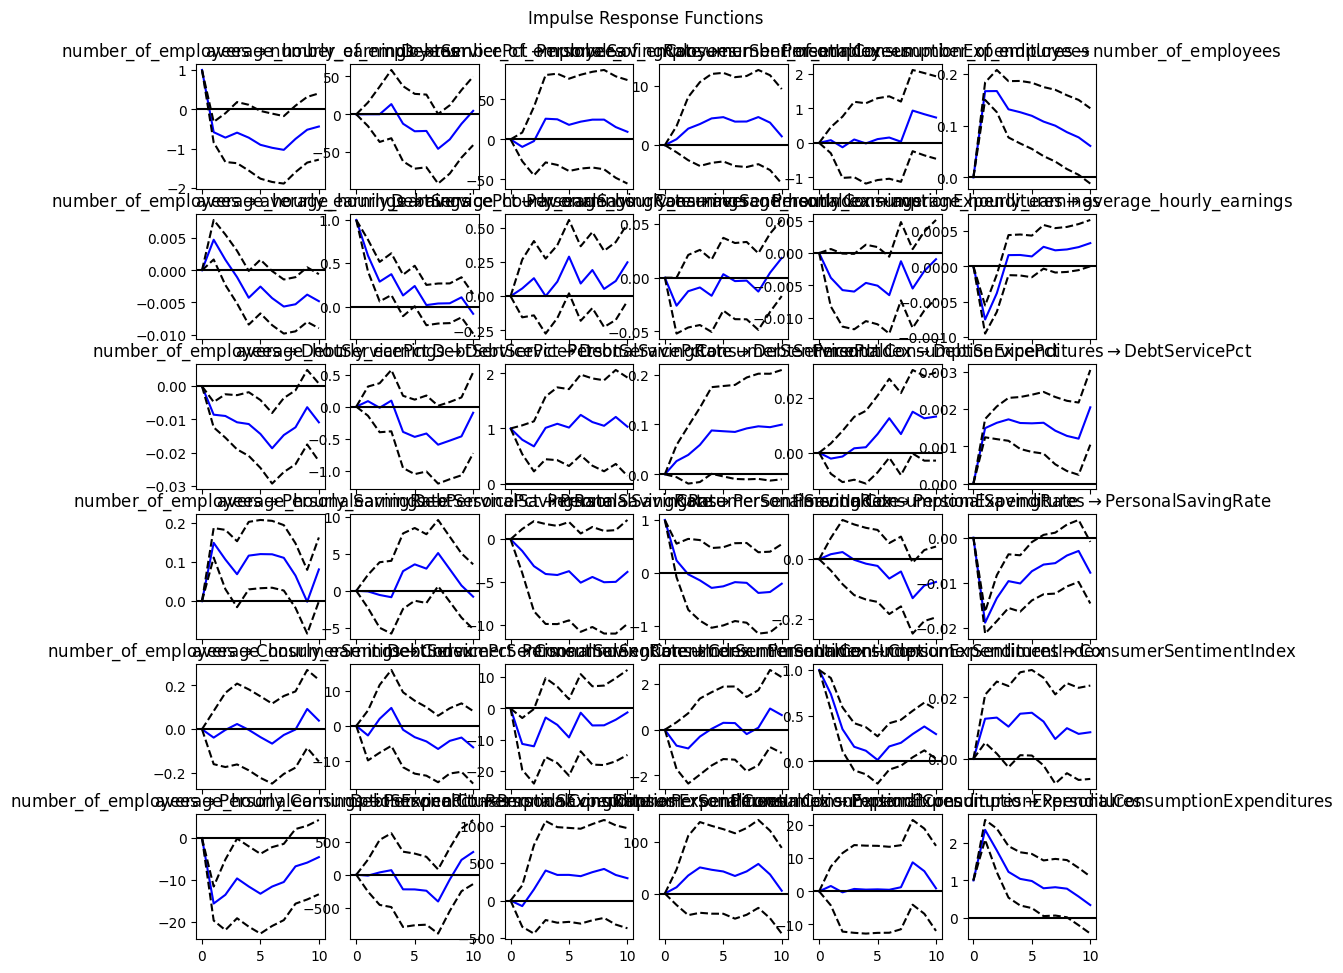

In [ ]:
# IRFs
irf = var_res.irf(10)
irf.plot(orth=False)
plt.suptitle("Impulse Response Functions")
plt.show()

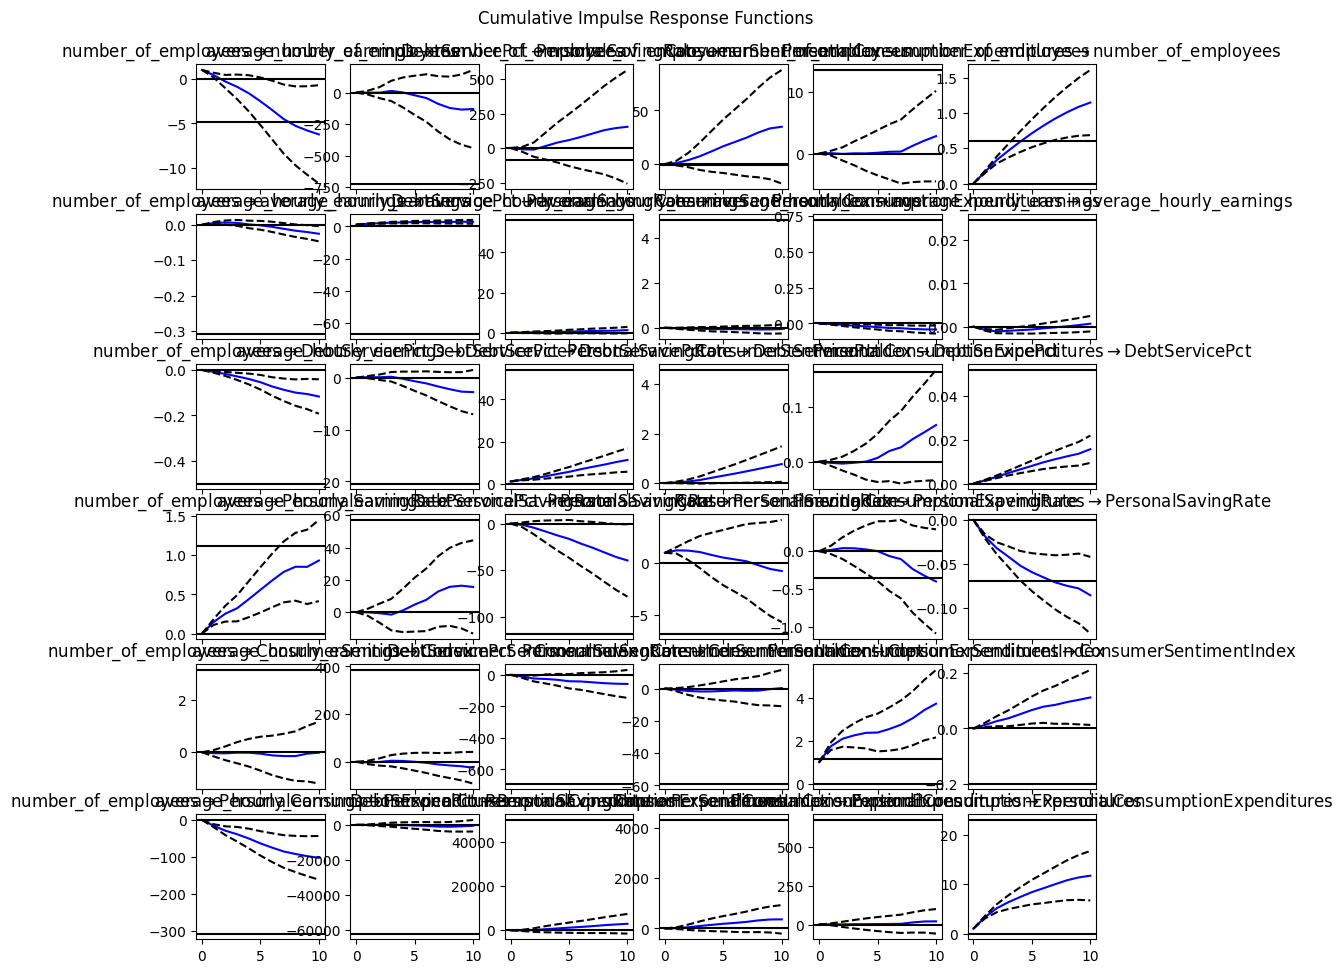

In [ ]:
irf.plot_cum_effects(orth=False)
plt.suptitle("Cumulative Impulse Response Functions")
plt.show()

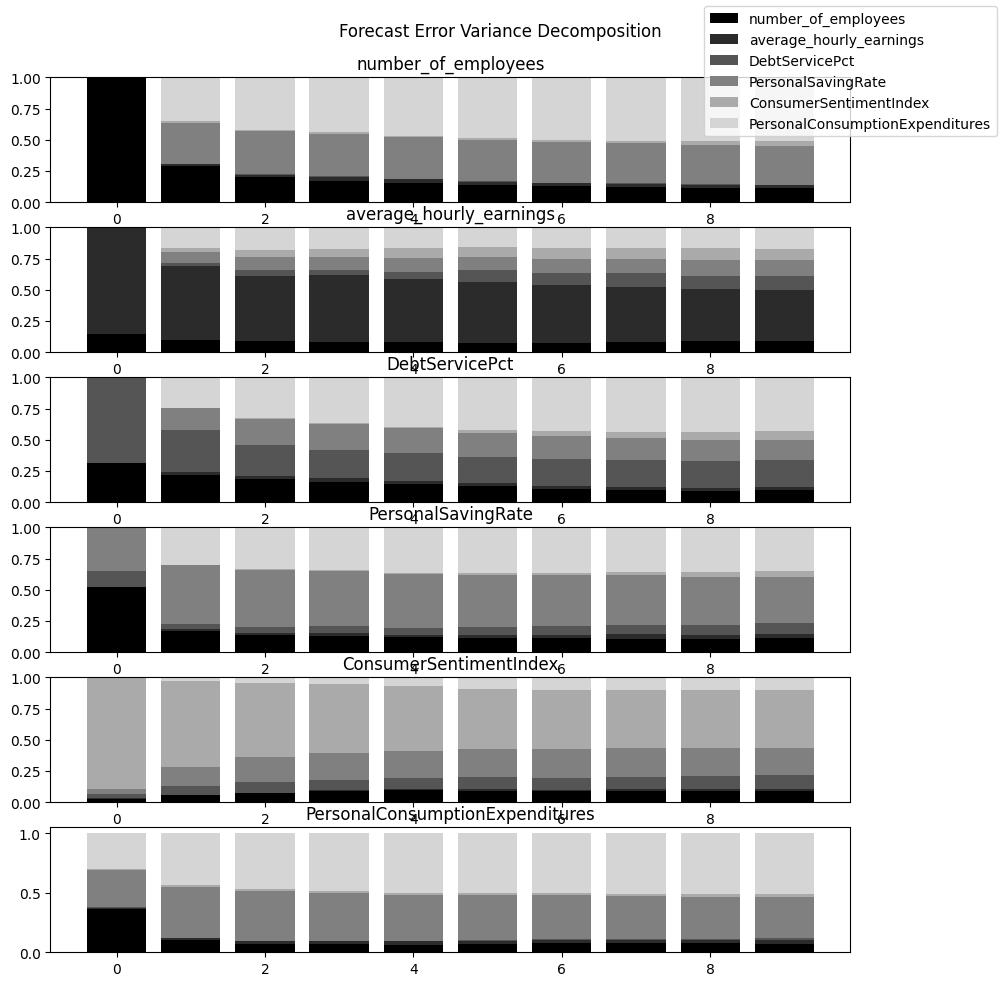

In [ ]:
fevd = var_res.fevd(10)
fevd.plot()
plt.suptitle("Forecast Error Variance Decomposition")
plt.show()

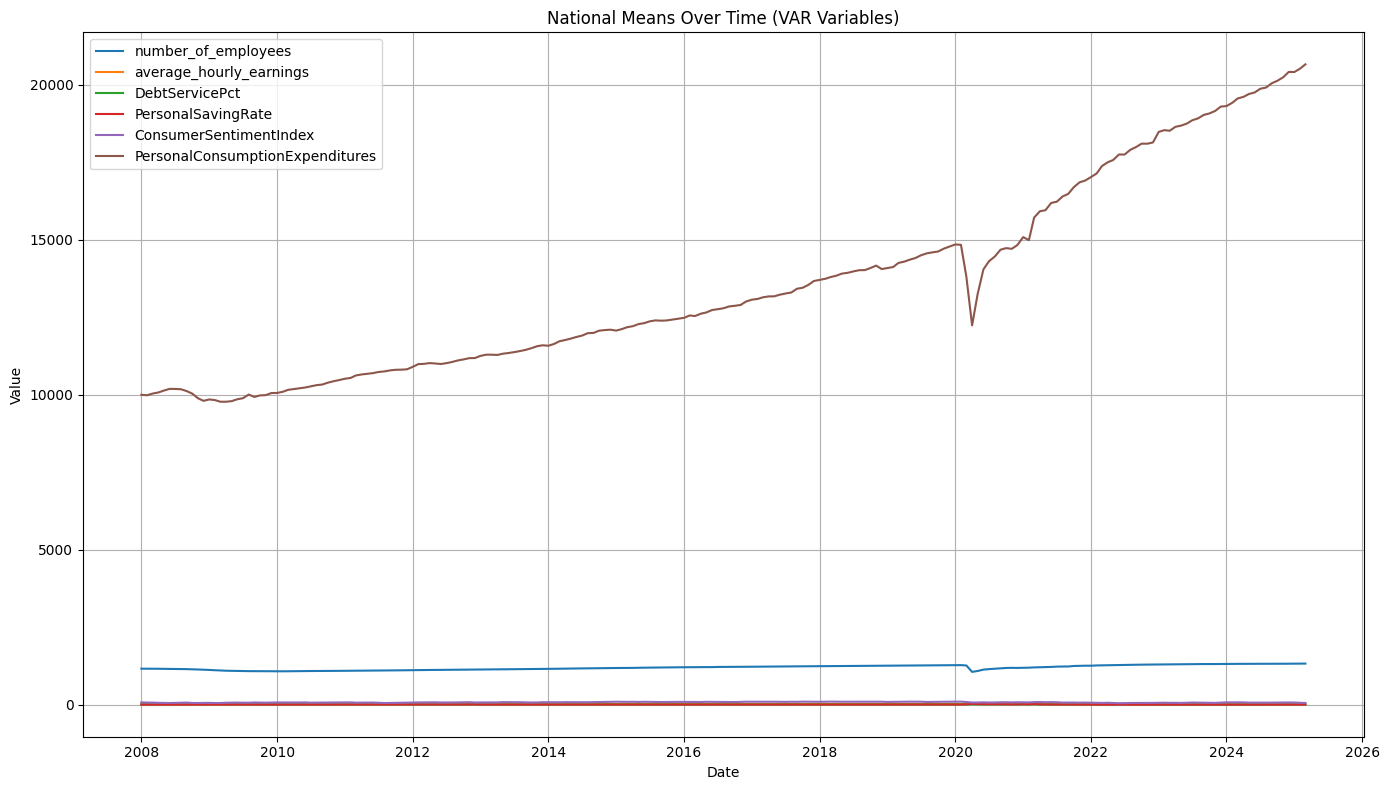

In [ ]:
plt.figure(figsize=(14,8))
for col in df_nat.columns:
    plt.plot(df_nat.index, df_nat[col], label=col)
plt.title("National Means Over Time (VAR Variables)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Sate are labor data
labor_df = pd.read_csv('/content/drive/MyDrive/datasets/Thesis Data/Final Data/bls_state_area_employment_hours_earnings.csv', parse_dates=['Date'])
print(labor_df.columns.tolist())
print(labor_df.head())

['Date', 'Year', 'Month', 'State', 'Sector', 'number_of_employees', 'average_weekly_hours', 'average_hourly_earnings']
        Date  Year Month    State              Sector  number_of_employees  \
0 2008-01-01  2008   Jan  Alabama  leisurehospitality                174.1   
1 2008-01-01  2008   Jan  Alabama       manufacturing                293.2   
2 2008-01-01  2008   Jan  Alabama         retailtrade                241.3   
3 2008-01-01  2008   Jan  Alabama        totalnonfarm               2028.7   
4 2008-01-01  2008   Jan  Alabama        totalprivate               1644.0   

   average_weekly_hours  average_hourly_earnings  
0                   NaN                     9.91  
1                  41.7                    20.52  
2                   NaN                      NaN  
3                   NaN                      NaN  
4                  36.0                    19.27  


In [ ]:
num_duplicates = labor_df.duplicated().sum()
print(f"Duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    labor_df = labor_df.drop_duplicates()
    print("Duplicates removed.")

# Check for missing values
print("Missing values per column:\n", labor_df.isnull().sum())


Duplicate rows: 0
Missing values per column:
 Date                           0
Year                           0
Month                          0
State                          0
Sector                         0
number_of_employees            0
average_weekly_hours       26640
average_hourly_earnings    22149
dtype: int64


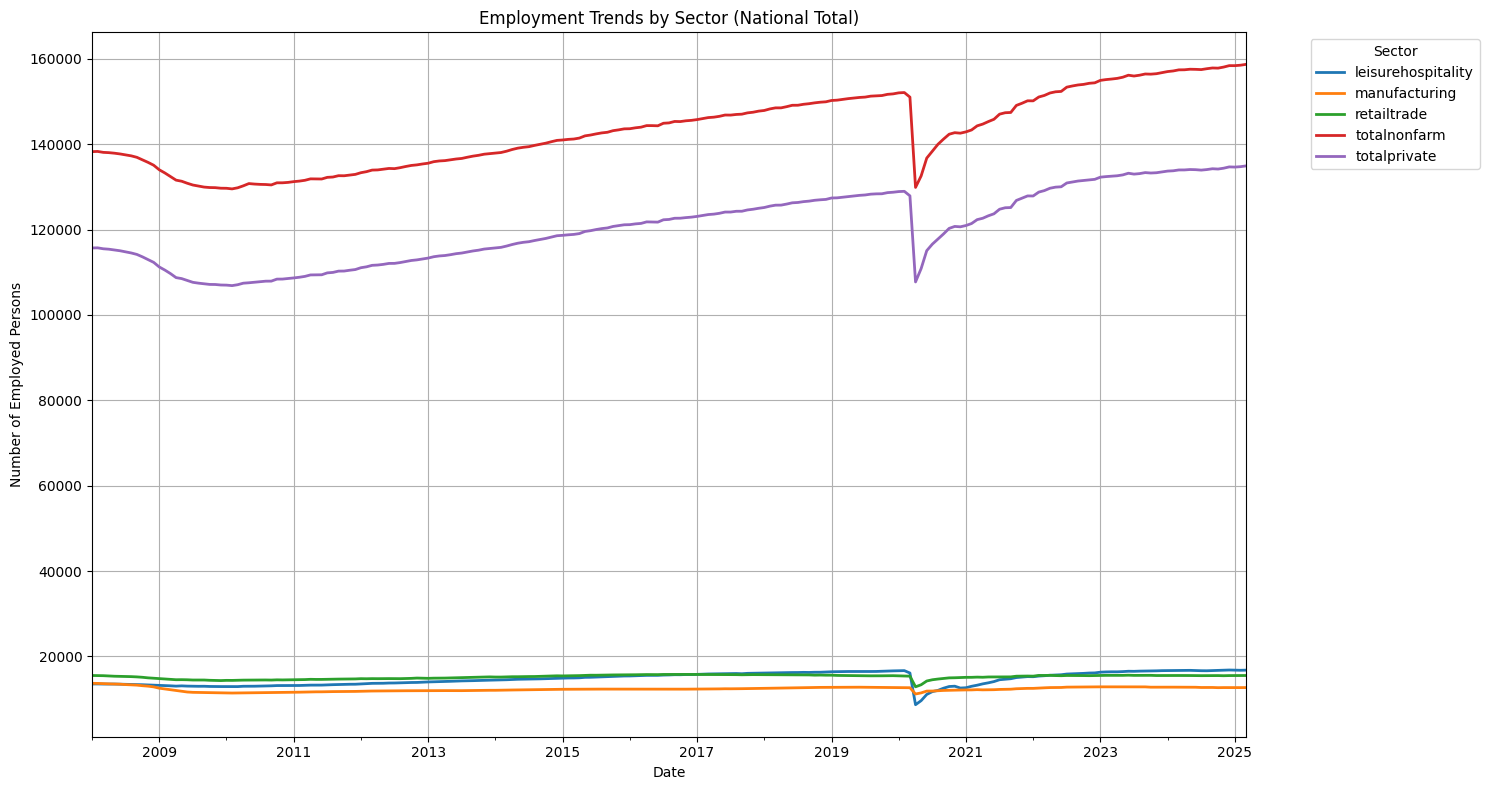

In [ ]:
sector_trend = (
    labor_df.groupby(['Date', 'Sector'])['number_of_employees']
    .sum()
    .reset_index()
)

sector_pivot = sector_trend.pivot(index='Date', columns='Sector', values='number_of_employees')

plt.figure(figsize=(15,8))
sector_pivot.plot(ax=plt.gca(), linewidth=2)
plt.title('Employment Trends by Sector (National Total)')
plt.xlabel('Date')
plt.ylabel('Number of Employed Persons')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


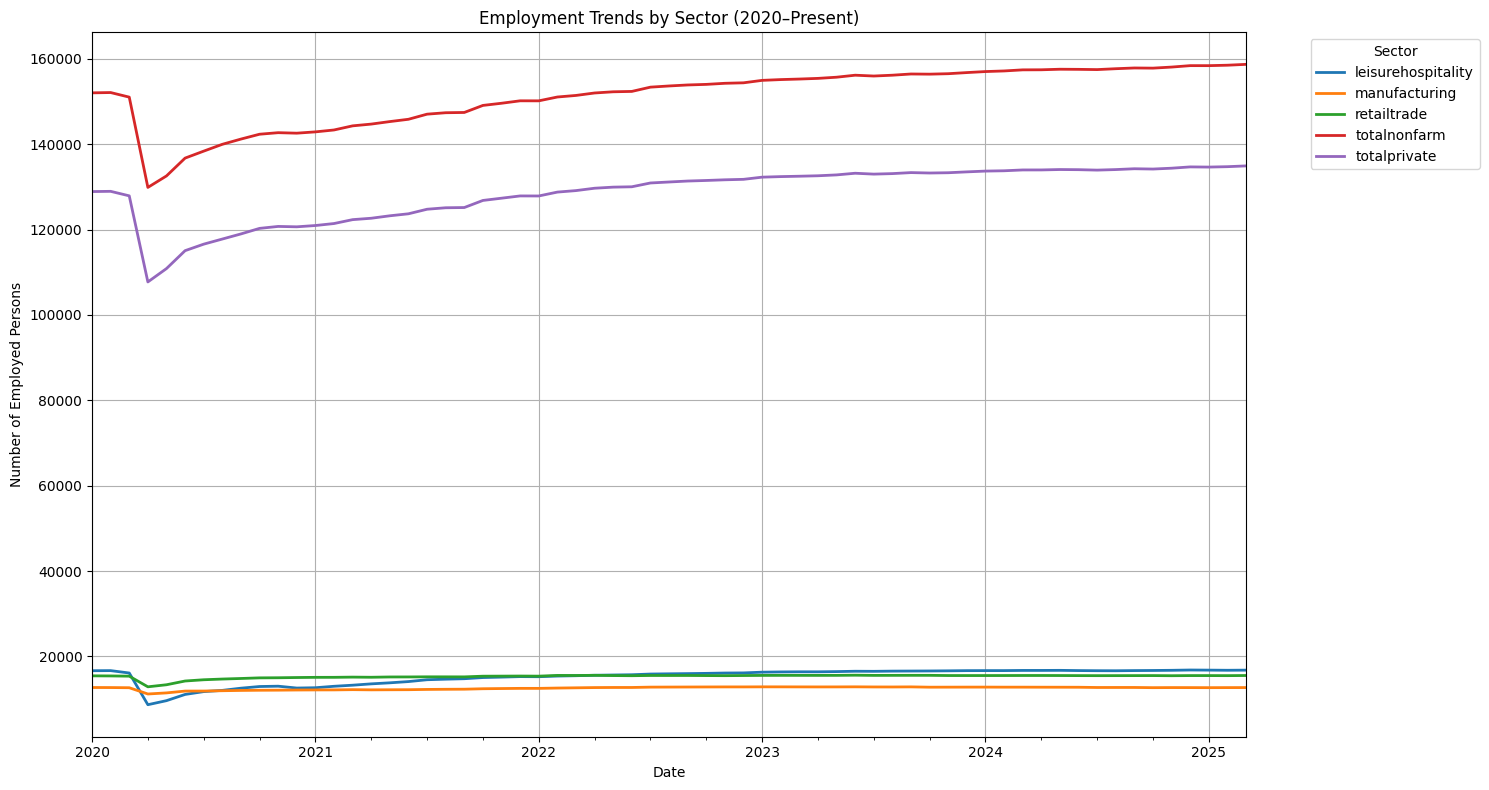

In [ ]:
emp_2020 = labor_df[labor_df['Date'] >= pd.to_datetime('2020-01-01')]
sector_trend_2020 = (
    emp_2020.groupby(['Date', 'Sector'])['number_of_employees']
    .sum()
    .reset_index()
)
sector_pivot_2020 = sector_trend_2020.pivot(index='Date', columns='Sector', values='number_of_employees')

plt.figure(figsize=(15,8))
sector_pivot_2020.plot(ax=plt.gca(), linewidth=2)
plt.title('Employment Trends by Sector (2020–Present)')
plt.xlabel('Date')
plt.ylabel('Number of Employed Persons')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


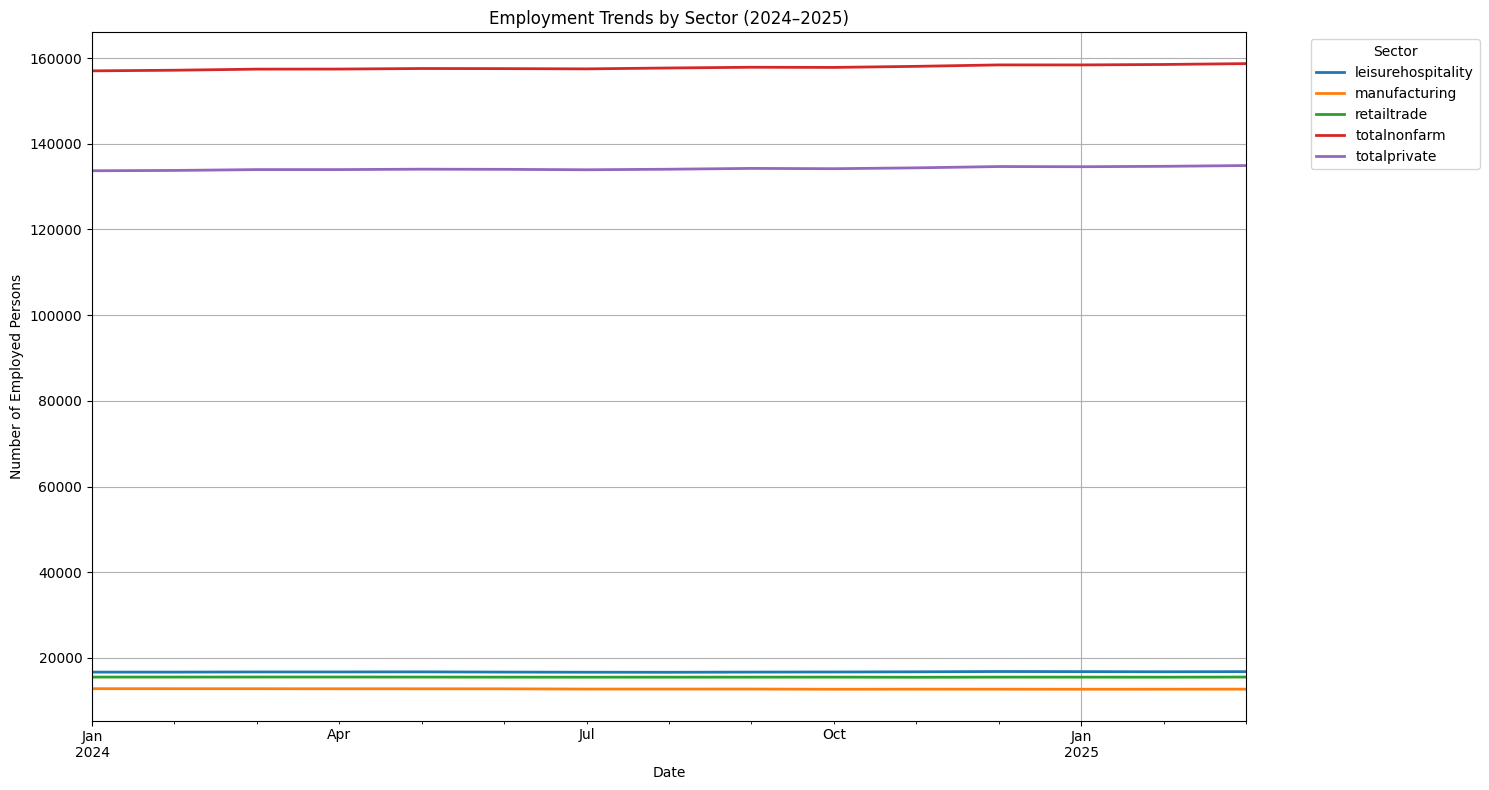

In [ ]:
emp_2425 = labor_df[
    (labor_df['Date'] >= pd.to_datetime('2024-01-01')) &
    (labor_df['Date'] <= pd.to_datetime('2025-12-31'))
]
sector_trend_2425 = (
    emp_2425.groupby(['Date', 'Sector'])['number_of_employees']
    .sum()
    .reset_index()
)
sector_pivot_2425 = sector_trend_2425.pivot(index='Date', columns='Sector', values='number_of_employees')

plt.figure(figsize=(15,8))
sector_pivot_2425.plot(ax=plt.gca(), linewidth=2)
plt.title('Employment Trends by Sector (2024–2025)')
plt.xlabel('Date')
plt.ylabel('Number of Employed Persons')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


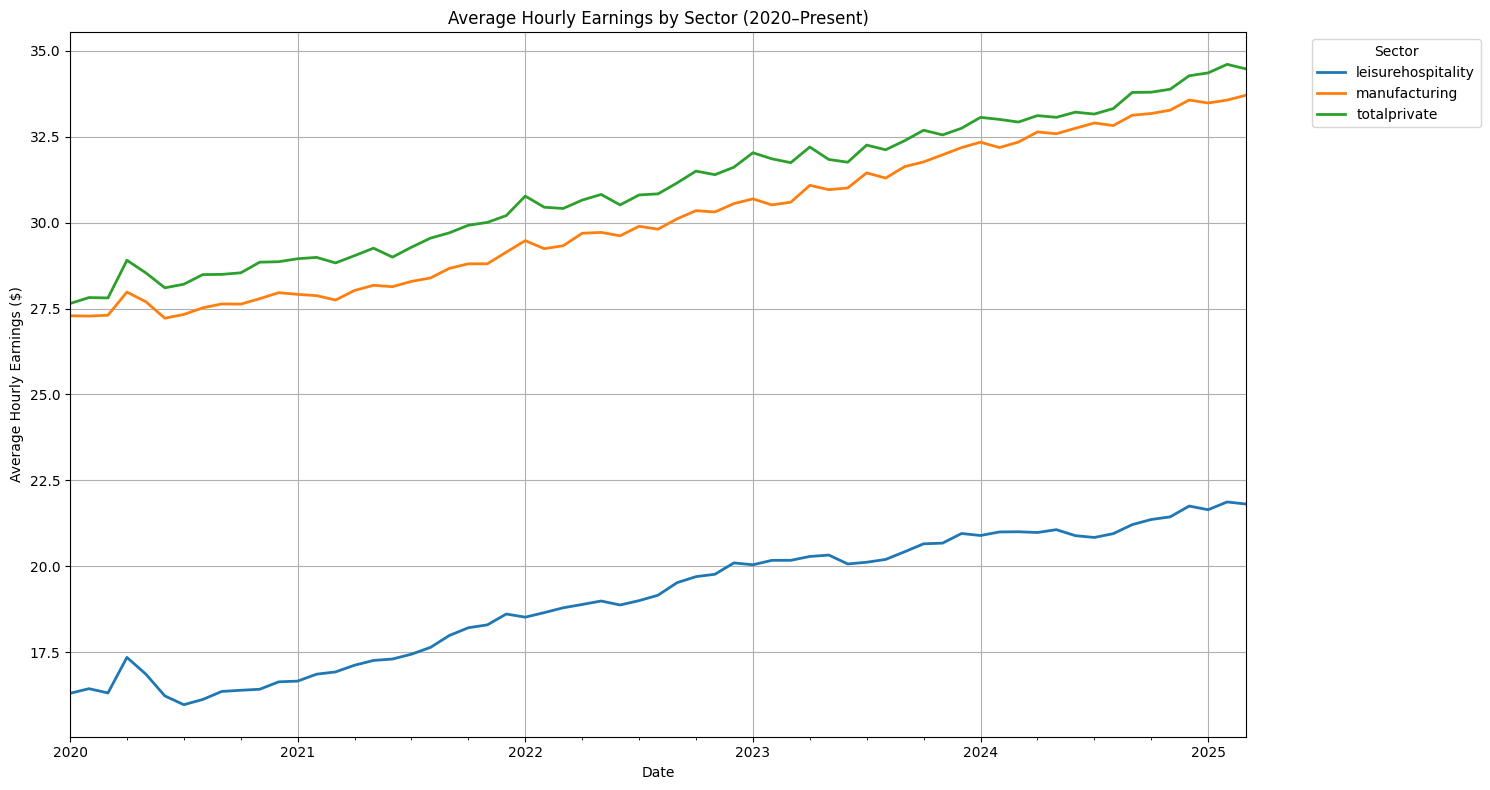

In [ ]:
wage_2020 = labor_df[
    (labor_df['Date'] >= pd.to_datetime('2020-01-01')) &
    (~labor_df['average_hourly_earnings'].isnull())
]
wage_trend_2020 = (
    wage_2020.groupby(['Date', 'Sector'])['average_hourly_earnings']
    .mean()
    .reset_index()
)
wage_pivot_2020 = wage_trend_2020.pivot(index='Date', columns='Sector', values='average_hourly_earnings')

plt.figure(figsize=(15,8))
wage_pivot_2020.plot(ax=plt.gca(), linewidth=2)
plt.title('Average Hourly Earnings by Sector (2020–Present)')
plt.xlabel('Date')
plt.ylabel('Average Hourly Earnings ($)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/datasets/Thesis Data/Final Data/earnings_by_sector.png')
plt.tight_layout()
plt.show()


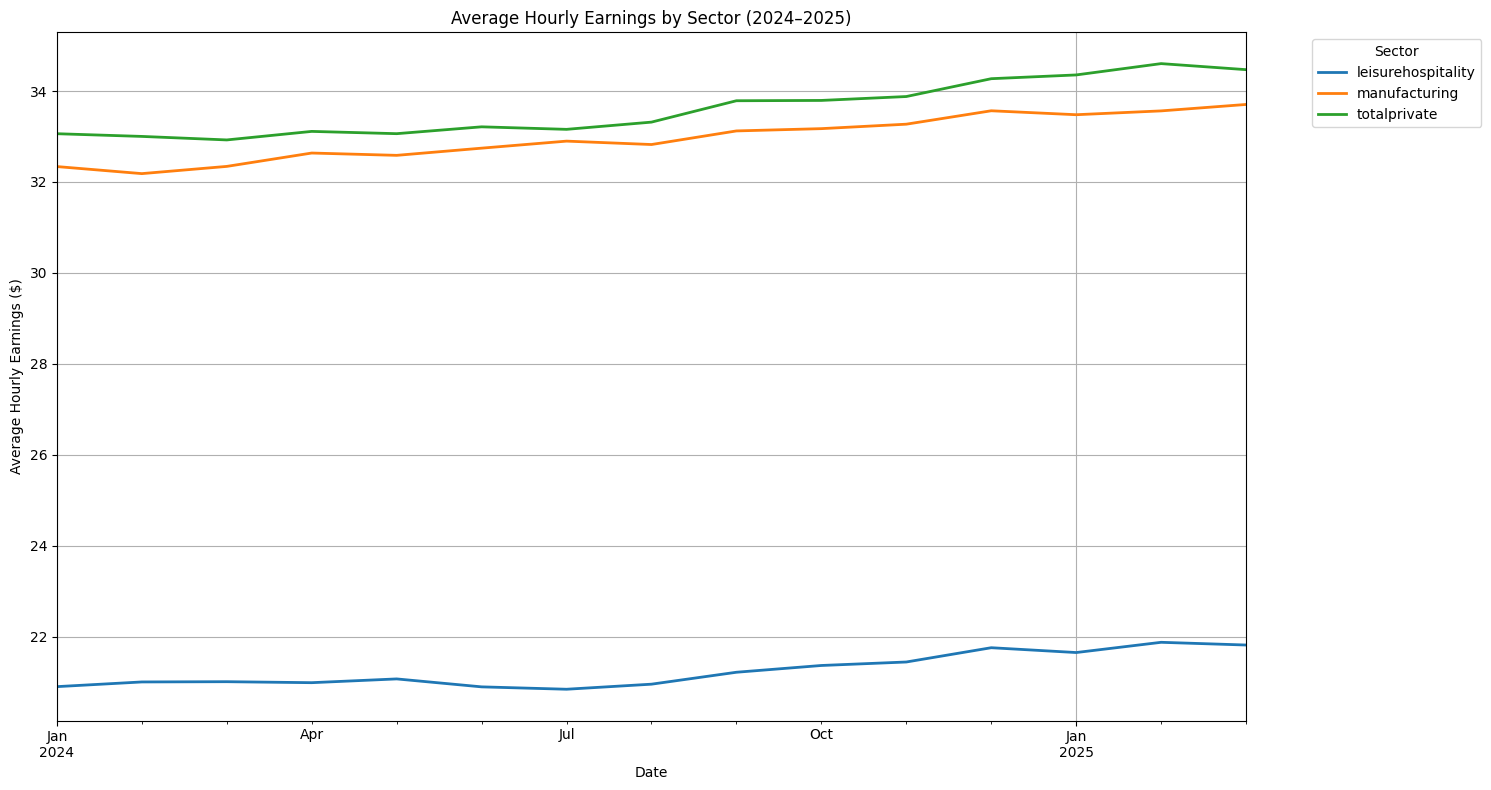

In [ ]:
wage_2425 = labor_df[
    (labor_df['Date'] >= pd.to_datetime('2024-01-01')) &
    (labor_df['Date'] <= pd.to_datetime('2025-12-31')) &
    (~labor_df['average_hourly_earnings'].isnull())
]
wage_trend_2425 = (
    wage_2425.groupby(['Date', 'Sector'])['average_hourly_earnings']
    .mean()
    .reset_index()
)
wage_pivot_2425 = wage_trend_2425.pivot(index='Date', columns='Sector', values='average_hourly_earnings')

plt.figure(figsize=(15,8))
wage_pivot_2425.plot(ax=plt.gca(), linewidth=2)
plt.title('Average Hourly Earnings by Sector (2024–2025)')
plt.xlabel('Date')
plt.ylabel('Average Hourly Earnings ($)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


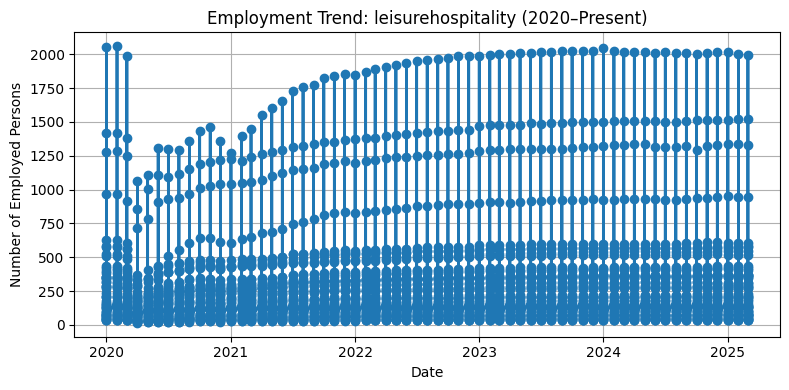

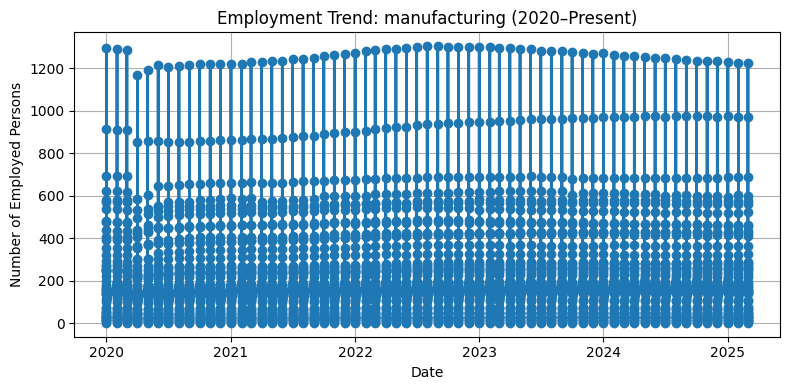

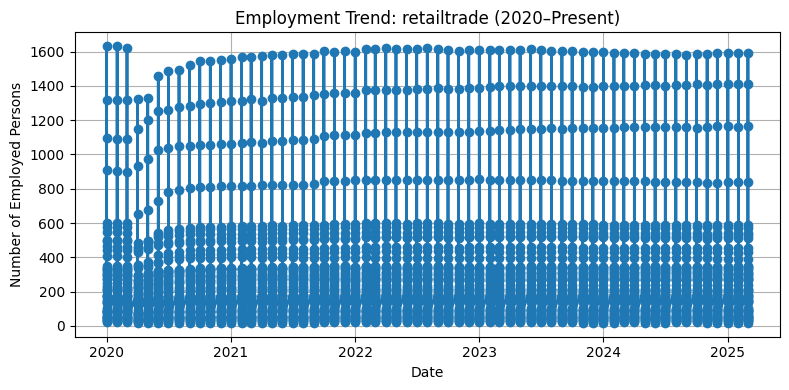

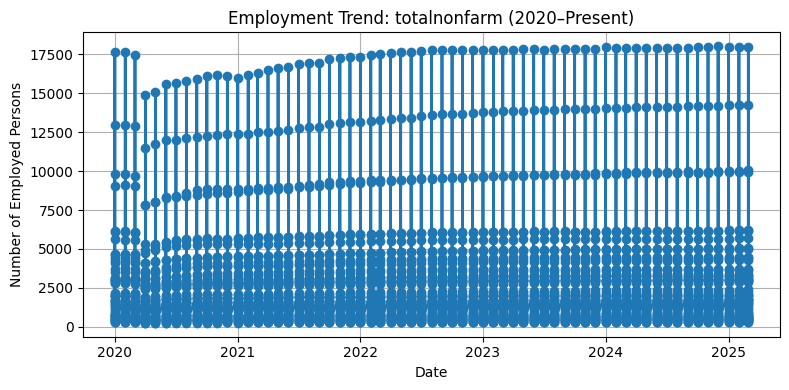

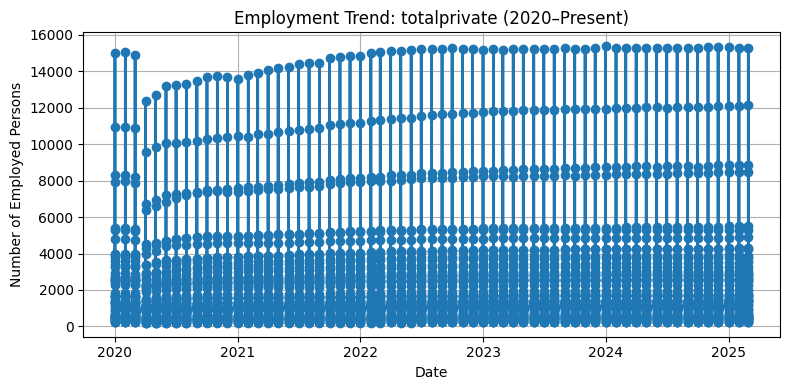

In [ ]:
emp_2020 = labor_df[labor_df['Date'] >= pd.to_datetime('2020-01-01')]

for sector in emp_2020['Sector'].unique():
    sector_data = emp_2020[emp_2020['Sector'] == sector]
    plt.figure(figsize=(8,4))
    plt.plot(sector_data['Date'], sector_data['number_of_employees'], marker='o', linewidth=2)
    plt.title(f'Employment Trend: {sector} (2020–Present)')
    plt.xlabel('Date')
    plt.ylabel('Number of Employed Persons')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


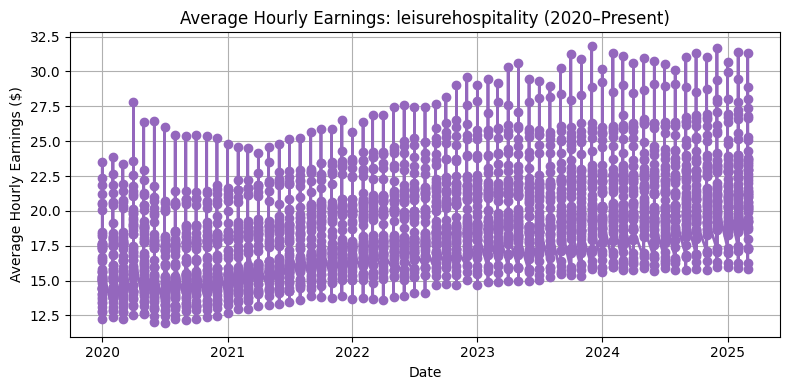

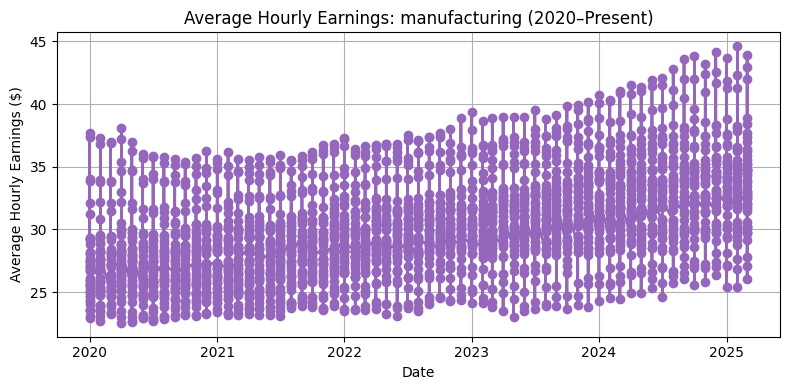

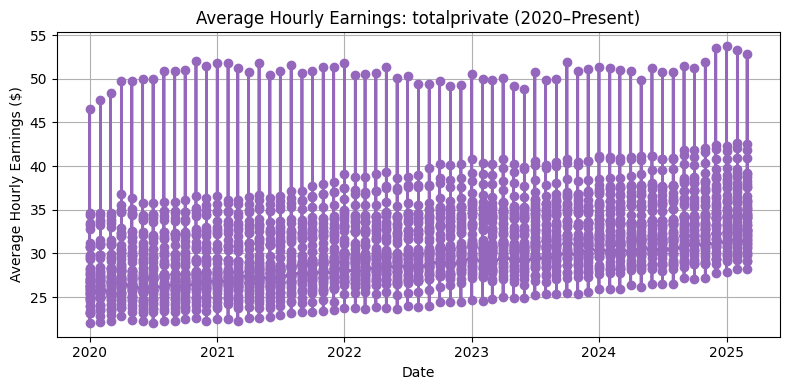

In [ ]:
wage_2020 = labor_df[
    (labor_df['Date'] >= pd.to_datetime('2020-01-01')) &
    (~labor_df['average_hourly_earnings'].isnull())
]

for sector in wage_2020['Sector'].unique():
    sector_data = wage_2020[wage_2020['Sector'] == sector]
    plt.figure(figsize=(8,4))
    plt.plot(sector_data['Date'], sector_data['average_hourly_earnings'], marker='o', linewidth=2, color='tab:purple')
    plt.title(f'Average Hourly Earnings: {sector} (2020–Present)')
    plt.xlabel('Date')
    plt.ylabel('Average Hourly Earnings ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


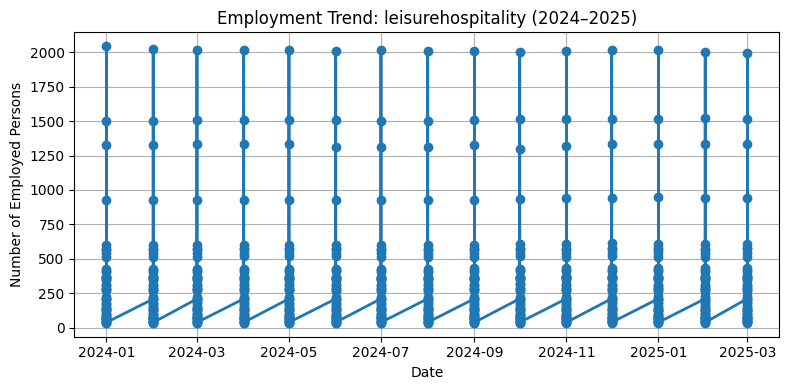

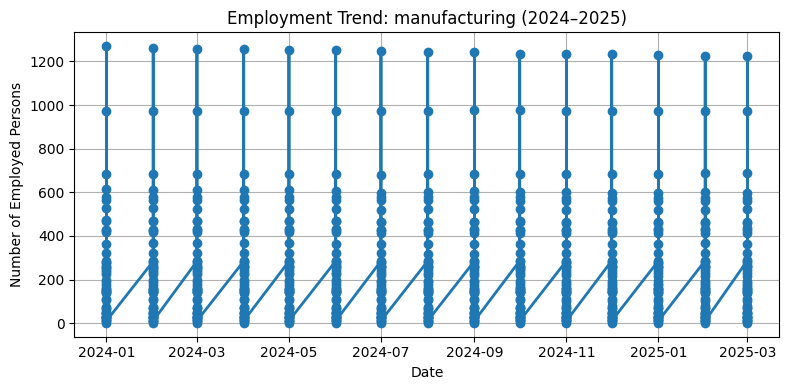

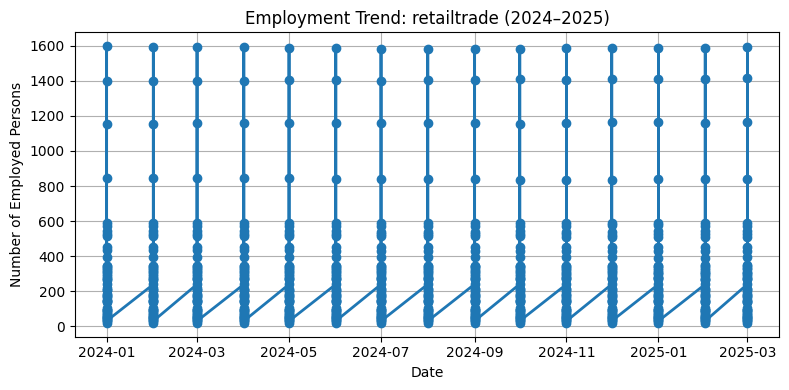

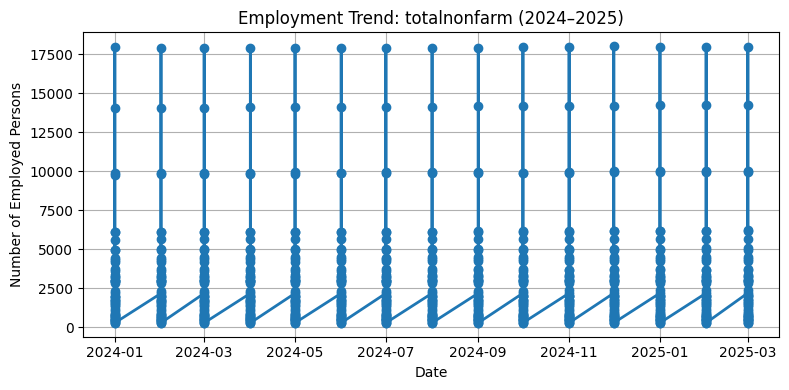

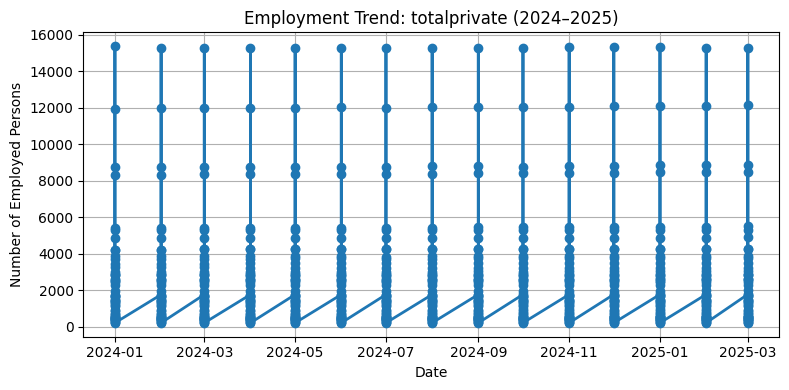

In [ ]:
emp_2425 = labor_df[
    (labor_df['Date'] >= pd.to_datetime('2024-01-01')) &
    (labor_df['Date'] <= pd.to_datetime('2025-12-31'))
]
for sector in emp_2425['Sector'].unique():
    sector_data = emp_2425[emp_2425['Sector'] == sector]
    plt.figure(figsize=(8,4))
    plt.plot(sector_data['Date'], sector_data['number_of_employees'], marker='o', linewidth=2)
    plt.title(f'Employment Trend: {sector} (2024–2025)')
    plt.xlabel('Date')
    plt.ylabel('Number of Employed Persons')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
